<a href="https://colab.research.google.com/github/jhuarancca/InteligenciaArtificialEnSalud/blob/main/Notebook_2_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://cloud.screenpresso.com/BiF4bZJT2saz/2024-10-03_06h25_42_original.png?_gl=1*1p2hf0x*_ga*OTY3NTc2Mjc4LjE3Mjc5Mjk1ODc.*_ga_Y5Z2778Y7J*MTcyNzkyOTU4Ny4xLjAuMTcyNzkyOTU4Ny4wLjAuMA.." width="2400">


# **Notebook 2: Exploración de Datos y Fundamentos de Imágenes Digitales**

## 1. Exploración de datos para el modelo de diagnóstico médico

In [ ]:
!git clone https://github.com/CVasquezroque/IA-en-salud-INSN.git

Cloning into 'IA-en-salud-INSN'...
remote: Enumerating objects: 5015, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 5015 (delta 0), reused 8 (delta 0), pack-reused 5006 (from 1)
Receiving objects: 100% (5015/5015), 1.87 GiB | 24.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (5001/5001), done.


### 1.1. Carga de Datos en Python

Antes de trabajar con imágenes, es esencial entender cómo cargar y explorar datos en Python. Utilizamos bibliotecas como **pandas** para cargar archivos CSV, una forma común de almacenar datos tabulares.

En este ejemplo, cargaremos un archivo llamado `data_ia_en_salud.csv` que contiene información sobre imágenes médicas, incluidas las etiquetas de diagnóstico.


Podemos cargar estos datos utilizando pandas:

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar un archivo CSV en un DataFrame
ruta_csv = '/content/IA-en-salud-INSN/data_ia_salud.csv'
datos = pd.read_csv(ruta_csv)
print(f'Hemos cargado {datos.shape[0]} filas y {datos.shape[1]} columnas')
datos

Hemos cargado 4999 filas y 19 columnas


,Image,PatientId,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,1,57,M,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,58,M,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,1,58,M,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,2,80,M,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_001.png,3,74,F,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,00001335_002.png,1335,18,F,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4995,00001335_003.png,1335,19,F,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4996,00001335_004.png,1335,19,F,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4997,00001335_005.png,1335,22,F,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Observa las distintas columnas en este archivo CSV. El archivo contiene los nombres de las imágenes de rayos X de tórax (columna "Image Index"), y las columnas llenas de unos y ceros identifican los diagnósticos asignados a cada imagen de rayos X.

> **Pregunta**: ¿Podrías identificar qué otras columnas podrían ser útiles para un análisis exploratorio de los datos?

### 1.2. Verificación de Tipos de Datos y Valores Nulos

Antes de continuar, es importante explorar los datos para tener una mejor comprensión de su calidad y estructura. Ejecuta la siguiente celda para explorar los tipos de datos presentes en cada columna y verificar si existen valores nulos en los datos. Esto nos permitirá determinar si necesitamos realizar algún tipo de limpieza antes de proceder.


In [ ]:
# Verificar el tipo de dato de cada columna y si existen valores nulos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               4999 non-null   object
 1   PatientId           4999 non-null   int64 
 2   Patient Age         4999 non-null   int64 
 3   Patient Gender      4999 non-null   object
 4   Atelectasis         4999 non-null   int64 
 5   Cardiomegaly        4999 non-null   int64 
 6   Consolidation       4999 non-null   int64 
 7   Edema               4999 non-null   int64 
 8   Effusion            4999 non-null   int64 
 9   Emphysema           4999 non-null   int64 
 10  Fibrosis            4999 non-null   int64 
 11  Hernia              4999 non-null   int64 
 12  Infiltration        4999 non-null   int64 
 13  Mass                4999 non-null   int64 
 14  No Finding          4999 non-null   int64 
 15  Nodule              4999 non-null   int64 
 16  Pleural_Thickening  4999

### 1.3. Exploración de Etiquetas de Datos

En esta sección, exploraremos las etiquetas de los datos. Esto es crucial para entender la distribución de las diferentes condiciones y asegurarnos de que tenemos una representación adecuada de cada una para el entrenamiento del modelo.

Ejecuta las siguientes dos celdas para crear una lista con los nombres de cada condición o enfermedad de los pacientes.

In [ ]:
columns = datos.keys()
columns = list(columns)
print(columns)

['Image', 'PatientId', 'Patient Age', 'Patient Gender', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [ ]:
# Eliminar elementos innecesarios
columns.remove('PatientId')
columns.remove('Image')
columns.remove('Patient Age')
columns.remove('Patient Gender')

In [ ]:
print(f"Tenemos {len(columns)} columnas con los diagnósticos para estas condiciones: {columns}")

Tenemos 15 columnas con los diagnósticos para estas condiciones: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


> **Nota**: Es importante realizar este tipo de análisis para identificar qué características serán útiles en el modelo de aprendizaje automático y cuáles se pueden descartar.

Ejecuta la siguiente celda para imprimir el número de etiquetas positivas (valores 1) para cada condición. Este análisis nos ayudará a entender la distribución de las clases y si existe algún desbalance significativo.

In [ ]:
# Imprimir el número de etiquetas positivas para cada clase
for column in columns:
    print(f'La clase {column} tiene {datos[column].sum()} muestras')

La clase Atelectasis tiene 460 muestras
La clase Cardiomegaly tiene 196 muestras
La clase Consolidation tiene 205 muestras
La clase Edema tiene 90 muestras
La clase Effusion tiene 487 muestras
La clase Emphysema tiene 125 muestras
La clase Fibrosis tiene 172 muestras
La clase Hernia tiene 27 muestras
La clase Infiltration tiene 830 muestras
La clase Mass tiene 161 muestras
La clase No Finding tiene 2754 muestras
La clase Nodule tiene 214 muestras
La clase Pleural_Thickening tiene 165 muestras
La clase Pneumonia tiene 65 muestras
La clase Pneumothorax tiene 199 muestras


### 1.4. Verificación de IDs Únicos

La columna "Patient ID" tiene un número de identificación para cada paciente. Algo importante que queremos saber sobre un conjunto de datos médicos como este es si estamos viendo datos repetidos para ciertos pacientes o si cada imagen representa a una persona diferente. Esto nos ayudará a asegurarnos de que el modelo no está siendo entrenado y probado con imágenes del mismo paciente, lo cual podría dar lugar a **fuga de datos**.

In [ ]:
print(f'El total de IDs de pacientes es {datos["PatientId"].count()}, de los cuales los IDs únicos son {datos["PatientId"].value_counts().shape[0]}')

El total de IDs de pacientes es 4999, de los cuales los IDs únicos son 1335


Como puedes ver, el número de pacientes únicos en el conjunto de datos es menor que el número total, lo cual indica que debe haber algunas repeticiones. Para los pacientes con múltiples registros, deberás asegurarte de que no aparezcan en ambos conjuntos de entrenamiento y prueba para evitar la fuga de datos (tema que se cubrirá más adelante en las lecciones de esta semana).

> **Pregunta para Reflexión**: ¿Qué problemas podrían surgir si no nos aseguramos de separar adecuadamente los registros de un mismo paciente entre el conjunto de entrenamiento y el de prueba?

## 2. Fundamentos de Imágenes Digitales



### 2.1. Estructura de una Imagen Digital

Las imágenes digitales están compuestas por **píxeles**, que son la unidad más pequeña de información visual en una imagen. Cada píxel tiene un valor que representa el color o la intensidad de la luz en esa ubicación específica de la imagen.

- **Resolución**: La resolución de una imagen se refiere a la cantidad de píxeles que componen la imagen, normalmente expresada como ancho x alto (por ejemplo, 1920x1080). Cuantos más píxeles tenga una imagen, mayor será la cantidad de información visual que contendrá y, por lo tanto, será más detallada.
- **Profundidad de bits**: La profundidad de bits hace referencia a la cantidad de bits utilizados para representar el color de cada píxel. Cuanto mayor sea la profundidad de bits, más colores pueden ser representados. Por ejemplo, una imagen con una profundidad de 8 bits por canal puede representar hasta 256 colores por canal.

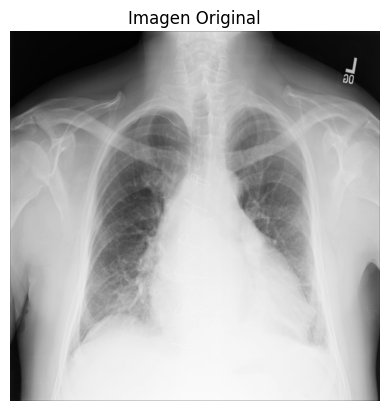

In [ ]:
# Importar las bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen en escala de grises
imagen = cv2.imread('/content/IA-en-salud-INSN/nih/images/00000001_002.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

In [ ]:
imagen.shape

(1024, 1024)

### 2.2. Preprocesamiento de Imágenes en Keras

Antes de entrenar un modelo, primero debes modificar tus imágenes para que sean más adecuadas para entrenar una red neuronal convolucional. Para esta tarea, utilizaremos la función [ImageDataGenerator](https://keras.io/preprocessing/image/) de Keras para realizar el preprocesamiento y la ampliación de datos.

In [ ]:
# Importar el generador de datos de Keras
import tensorflow as tf
# Normalizar imágenes
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True, # Establecer la media de cada muestra a 0.
    samplewise_std_normalization=True # Dividir cada entrada por su desviación estándar
)


#### **Estandarización**

El `image_generator` que creaste anteriormente ajustará los datos de imagen de tal manera que la nueva media de los datos será cero y la desviación estándar será 1.

En otras palabras, el generador reemplazará cada valor de píxel en la imagen por un nuevo valor calculado restando la media y dividiendo por la desviación estándar.

$$
\frac{x_i - \mu}{\sigma}
$$

Ejecuta la siguiente celda para preprocesar tus datos utilizando el `image_generator`. En este paso también reducirás el tamaño de la imagen a 320x320 píxeles.


In [ ]:
# Flujo desde el directorio con tamaño de lote y tamaño de imagen objetivo especificados
generator = image_generator.flow_from_dataframe(
        dataframe=datos,
        directory="/content/IA-en-salud-INSN/nih/images/",
        x_col="Image", # características
        y_col=['Fibrosis'], # etiquetas
        class_mode="raw", # 'Fibrosis' debería estar en el DataFrame
        batch_size=1, # imágenes por lote
        shuffle=False, # barajar las filas o no
        target_size=(320, 320) # ancho y alto de la imagen de salida
)

Found 4999 validated image filenames.


Ejecute la siguiente celda para trazar un ejemplo de una imagen preprocesada

Las dimensiones de la imagen son 320 pixeles de ancho y 320 pixeles de alto
El valor máximo de píxel es 1.8811 y el mínimo es -1.9009
El valor medio de los píxeles es 0.0000 y la desviación estándar es 1.0000


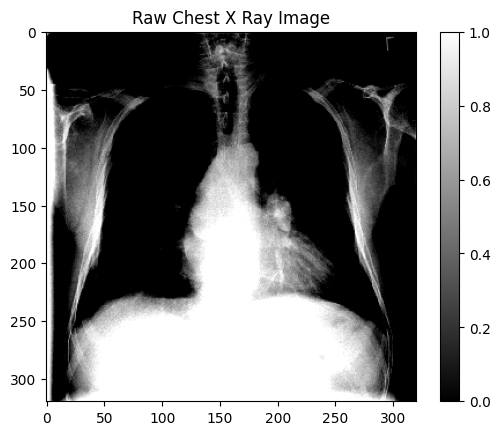

In [ ]:
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"Las dimensiones de la imagen son {generated_image.shape[1]} pixeles de ancho y {generated_image.shape[2]} pixeles de alto")
print(f"El valor máximo de píxel es {generated_image.max():.4f} y el mínimo es {generated_image.min():.4f}")
print(f"El valor medio de los píxeles es {generated_image.mean():.4f} y la desviación estándar es {generated_image.std():.4f}")


### 2.3. Filtros y Kernels en Procesamiento de Imágenes

Las imágenes digitales se pueden transformar mediante la aplicación de **filtros**, los cuales utilizan **kernels** para modificar los valores de los píxeles y resaltar características específicas. Un **kernel** es una pequeña matriz (por ejemplo, 3x3 o 5x5) que se aplica sobre la imagen para modificar los valores de los píxeles según un criterio específico. Cada valor del kernel se multiplica por el valor del píxel y sus vecinos, y la suma de estos productos se convierte en el nuevo valor del píxel central.

Por ejemplo, consideremos un kernel de 3x3 para detección de bordes:

\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix}


Este kernel ayuda a resaltar los bordes verticales de una imagen.


Vamos a implementar algunos kernels simples y aplicar estos filtros manualmente para comprender cómo funcionan antes de utilizar las funciones ya definidas en OpenCV.

Primero, veamos un ejemplo donde aplicamos un kernel manualmente usando la función `cv2.filter2D()`.


**¿Qué es `cv2.filter2D()`?**

La función `cv2.filter2D()` es una herramienta de OpenCV que nos permite aplicar un **filtro** (en este caso, un kernel) a una imagen. Esta función realiza una **convolución** entre la imagen y el kernel, generando una nueva imagen donde se han resaltado ciertas características según el kernel utilizado.

Veamos los parámetros que usamos en `filter2D()`:

- **`src`**: La imagen de entrada sobre la cual se aplicará el filtro.
- **`ddepth`**: La profundidad de la imagen de salida. Usualmente usamos `-1` para mantener la misma profundidad que la imagen original.
- **`kernel`**: El kernel que definimos, una pequeña matriz que indicará cómo modificar los píxeles de la imagen.



Veamos cómo se aplica:


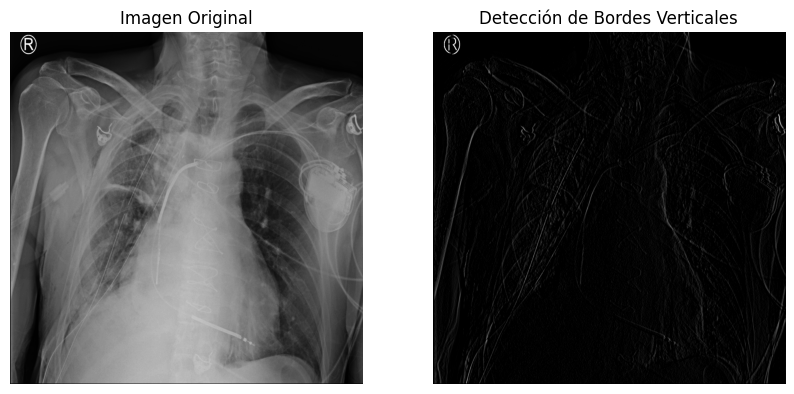

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread('/content/IA-en-salud-INSN/nih/images/00000013_002.png', cv2.IMREAD_GRAYSCALE)

# Definir un kernel de detección de bordes verticales
kernel_bordes = np.array([[1, 0, -1],
                          [1, 0, -1],
                          [1, 0, -1]])

# Aplicar el kernel usando la función de convolución de OpenCV
imagen_bordes = cv2.filter2D(src=imagen, ddepth=-1, kernel=kernel_bordes)

# Mostrar la imagen original y la imagen con bordes detectados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_bordes, cmap='gray')
plt.title('Detección de Bordes Verticales')
plt.axis('off')
plt.show()

En este ejemplo, utilizamos `cv2.filter2D()` para aplicar el **kernel de detección de bordes verticales**. Este kernel resalta las áreas donde hay un cambio significativo en los valores de píxeles en la dirección vertical, ayudándonos a visualizar los bordes verticales de los objetos en la imagen.


> **Tarea**: Cambia los valores del kernel y observa cómo afectan el resultado. Intenta diseñar un kernel que detecte bordes horizontales.


### Relación con OpenCV y Mapas de Características

Los filtros que podemos implementar manualmente tienen equivalentes en OpenCV, como `cv2.Canny()`, entre otros. Sin embargo, es importante entender que detrás de cada una de estas funciones hay una operación con un kernel que altera los valores de los píxeles de la imagen para obtener un resultado deseado.

En una red neuronal convolucional (CNN), muchos de estos **kernels** son aprendidos automáticamente durante el proceso de entrenamiento. Estos kernels, aplicados a las imágenes, generan **mapas de características** que resaltan diferentes aspectos, como bordes, texturas, o patrones más complejos.

Cada **mapa de características** es el resultado de aplicar un kernel específico a la imagen de entrada. Al tener varios mapas de características, la CNN puede entender la imagen de una manera más detallada y aprender patrones complejos que son útiles para tareas como clasificación o detección de objetos.

> La **convolución** es un proceso matemático en el que un kernel se desliza sobre la imagen y se calcula la suma ponderada de los píxeles dentro del área cubierta por el kernel. Esta operación nos permite resaltar ciertas características de la imagen.


<img src="https://www.semiconductorforu.com/wp-content/uploads/2018/12/A-CNN-breaks-an-image-into-feature-maps.jpg" width="2400">
